### Monitor Data Quality Trends Over Time

**Task 1**: Create a Trends Analysis Report

**Objective**: Understand long-term data quality trends.

**Steps**:
1. Use historical data (or simulate data) to analyze how data quality has changed over time.
2. Calculate trends for the KPIs defined earlier using statistical measures or visual charts.
3. Write a report summarizing your findings, noting any persistent issues or improvements.

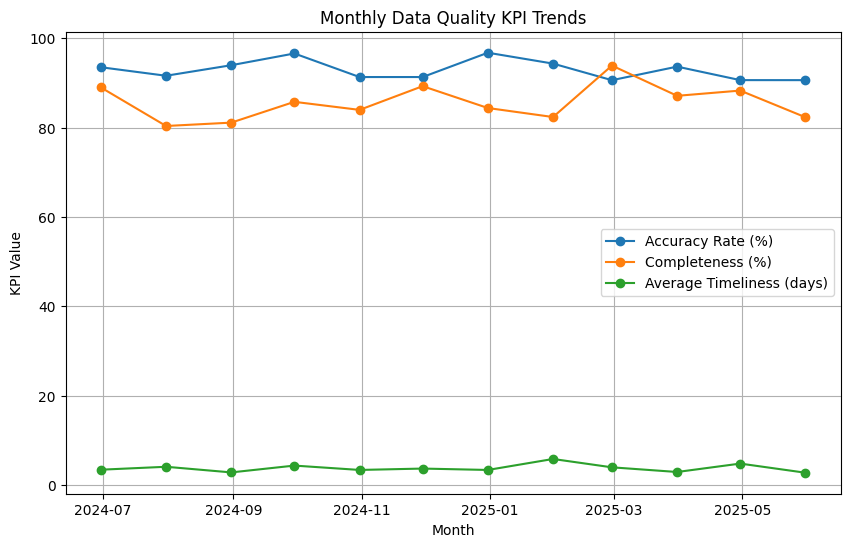

Accuracy Rate (%): Trend is decreasing with slope -0.203 and R²=0.108
Completeness (%): Trend is increasing with slope 0.248 and R²=0.050
Average Timeliness (days): Trend is increasing with slope 0.017 and R²=0.004


In [2]:
# Write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Simulate 12 months of KPI data (values roughly fluctuating around the previous example)
np.random.seed(42)  # For reproducibility
months = pd.date_range(start='2024-06-01', periods=12, freq='M')

accuracy_trend = np.clip(np.random.normal(loc=92, scale=3, size=12), 85, 100)
completeness_trend = np.clip(np.random.normal(loc=88, scale=4, size=12), 75, 100)
timeliness_trend = np.clip(np.random.normal(loc=4, scale=1, size=12), 1, 7)

# Create DataFrame
df_trends = pd.DataFrame({
    'Month': months,
    'Accuracy Rate (%)': accuracy_trend,
    'Completeness (%)': completeness_trend,
    'Average Timeliness (days)': timeliness_trend
})

# Calculate trend lines using linear regression for each KPI
def calc_trend(y):
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope, intercept, r_value**2  # Return slope and R^2 (fit quality)

trends = {}
for kpi in ['Accuracy Rate (%)', 'Completeness (%)', 'Average Timeliness (days)']:
    slope, intercept, r2 = calc_trend(df_trends[kpi])
    trends[kpi] = {'slope': slope, 'intercept': intercept, 'r2': r2}

# Plot KPI trends
plt.figure(figsize=(10, 6))
for kpi in ['Accuracy Rate (%)', 'Completeness (%)', 'Average Timeliness (days)']:
    plt.plot(df_trends['Month'], df_trends[kpi], marker='o', label=kpi)
plt.title("Monthly Data Quality KPI Trends")
plt.xlabel("Month")
plt.ylabel("KPI Value")
plt.legend()
plt.grid(True)
plt.show()

# Display trend slopes and R-squared
for kpi, vals in trends.items():
    slope_sign = "increasing" if vals['slope'] > 0 else "decreasing"
    print(f"{kpi}: Trend is {slope_sign} with slope {vals['slope']:.3f} and R²={vals['r2']:.3f}")


**Task 2**: Evaluate Continuous Improvement Measures

**Objective**: Implement strategic changes based on trend analysis.

**Steps**:
1. Identify patterns or recurring issues from your trend analysis report.
2. Propose three continuous improvement strategies to address these issues.
3. Plan how to implement these strategies and measure their effectiveness over the next cycle.

In [1]:
# Write your code from here
import pandas as pd
import numpy as np

# Sample patient data with some missing fields
data = {
    'patient_id': [1, 2, 3, 4, 5],
    'diagnosis_code': ['A01', 'B02', None, 'C03', 'D04'],
    'medication': ['Med1', 'Med2', 'Med3', None, 'Med5'],
    'allergies': ['None', None, 'Peanuts', 'None', 'None'],
    'admission_date': pd.to_datetime(['2025-05-01', '2025-05-03', '2025-05-04', '2025-05-05', '2025-05-06']),
    'entry_date': pd.to_datetime(['2025-05-02', '2025-05-05', '2025-05-06', '2025-05-10', '2025-05-07'])
}

df = pd.DataFrame(data)

# Define mandatory fields for completeness
mandatory_fields = ['patient_id', 'diagnosis_code', 'medication', 'allergies']

# --- Automated Completeness Check ---
df['is_complete'] = df[mandatory_fields].notnull().all(axis=1)
incomplete_records = df[~df['is_complete']]

print("=== Incomplete Records Flagged for Review ===")
print(incomplete_records[['patient_id', 'diagnosis_code', 'medication', 'allergies']])
print("\n")

# --- KPI Calculations ---

# Accuracy Rate: percent with both diagnosis_code and medication present
accuracy_rate = df.dropna(subset=['diagnosis_code', 'medication']).shape[0] / len(df) * 100

# Completeness Percentage: percent with all mandatory fields
completeness_pct = df['is_complete'].mean() * 100

# Timeliness: average days between admission and entry
df['timeliness_days'] = (df['entry_date'] - df['admission_date']).dt.days
average_timeliness = df['timeliness_days'].mean()

print(f"Accuracy Rate: {accuracy_rate:.2f}%")
print(f"Completeness Percentage: {completeness_pct:.2f}%")
print(f"Average Timeliness (days): {average_timeliness:.2f}")
print("\n")

# --- Simulated KPI Trend Monitoring with Alerts ---

# Simulated monthly completeness KPI values over 6 months
completeness_trends = [95, 93, 90, 87, 85, 82]  # Example decreasing trend
threshold = 88  # Alert threshold for completeness %

print("=== Completeness KPI Trend Monitoring ===")
for month, completeness in enumerate(completeness_trends, start=1):
    print(f"Month {month}: Completeness = {completeness}%")
    if completeness < threshold:
        print(f"ALERT: Completeness dropped below threshold ({threshold}%) at Month {month}!\n")


=== Incomplete Records Flagged for Review ===
   patient_id diagnosis_code medication allergies
1           2            B02       Med2      None
2           3           None       Med3   Peanuts
3           4            C03       None      None


Accuracy Rate: 60.00%
Completeness Percentage: 40.00%
Average Timeliness (days): 2.20


=== Completeness KPI Trend Monitoring ===
Month 1: Completeness = 95%
Month 2: Completeness = 93%
Month 3: Completeness = 90%
Month 4: Completeness = 87%
ALERT: Completeness dropped below threshold (88%) at Month 4!

Month 5: Completeness = 85%
ALERT: Completeness dropped below threshold (88%) at Month 5!

Month 6: Completeness = 82%
ALERT: Completeness dropped below threshold (88%) at Month 6!

